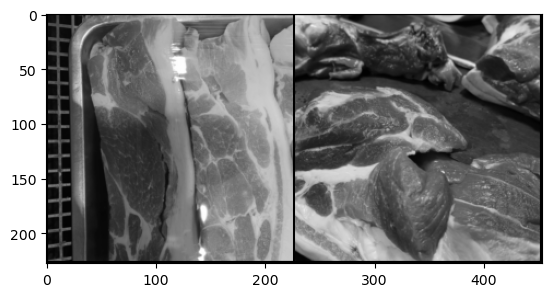

In [10]:
from torchvision.datasets import ImageFolder
import torchvision 
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

transforms = transforms.Compose([
    transforms.Resize(256),    # 将图片短边缩放至256，长宽比保持不变：
    transforms.CenterCrop(224),   #将图片从中心切剪成3*224*224大小的图片
    transforms.ToTensor()          #把图片进行归一化，并把数据转换成Tensor类型
]) 

path = r'C:/Users/beichen/dataset/pork2'
 
data_train = datasets.ImageFolder(path, transform=transforms)
 
data_loader = DataLoader(data_train, batch_size=2, shuffle=True)
 
for i, data in enumerate(data_loader):
    images, labels = data
 
    # 打印数据集中的图片
    img = torchvision.utils.make_grid(images).numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()
 
    break

In [4]:
#打开存放图片的文件夹，然后遍历文件名，把文件名字， label 还有 文件夹名写入data.txt文件中。
 
import os
 
def make_txt(root, file_name, label):
    path = os.path.join(root, file_name)  
 
    data = os.listdir(path)
 
    f = open(root + '/' + 'data.txt', 'a')
 
    for line in data:
        f.write(line + ' ' + str(label) + ' ' + file_name + '\n')
    f.close()
 
path = r'C:/Users/beichen/dataset/pork'
 
# 调用函数生成两个文件夹下的txt文件
make_txt(path, file_name='class1', label=0)
make_txt(path, file_name='class2', label=1)

In [5]:
#我们读取图片的根目录， 在根目录下有所有图片的txt文件， 拿到txt文件后， 先读取txt文件， 之后遍历txt文件中的每一行， 首先去除掉尾部的换行符， 在以空格切分，前半部分是图片名称， 后半部分是图片标签， 当图片名称和根目录结合，就得到了我们的图片路径
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import torch.nn as nn
import torch
import torchvision
from PIL import Image
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
 
 
 
transforms = transforms.Compose([
    transforms.Resize(256),    # 将图片短边缩放至256，长宽比保持不变：
    transforms.CenterCrop(224),   #将图片从中心切剪成3*224*224大小的图片
    transforms.ToTensor()          #把图片进行归一化，并把数据转换成Tensor类型
])
 
class MyDataset(Dataset):
    def __init__(self, img_path, transform=None):
        super(MyDataset, self).__init__()
        self.root = img_path
 
        self.txt_root = self.root + '\\' + 'data.txt'
 
        f = open(self.txt_root, 'r')
        data = f.readlines()
 
        imgs = []
        labels = []
        for line in data:
            line = line.rstrip()
            word = line.split()
            #print(word[0], word[1], word[2])   
            #word[0]是图片名字.jpg  word[1]是label  word[2]是文件夹名，如sunflower
            imgs.append(os.path.join(self.root,word[2], word[0]))
 
            labels.append(word[1])
        self.img = imgs
        self.label = labels
        self.transform = transform
 
    def __len__(self):
        return len(self.label)
 
    def __getitem__(self, item):
        img = self.img[item]
        label = self.label[item]
 
        img = Image.open(img).convert('RGB')
 
        # 此时img是PIL.Image类型   label是str类型
 
        if self.transform is not None:
            img = self.transform(img)
 
        label = np.array(label).astype(np.int64)
        label = torch.from_numpy(label)
 
        return img, label
 


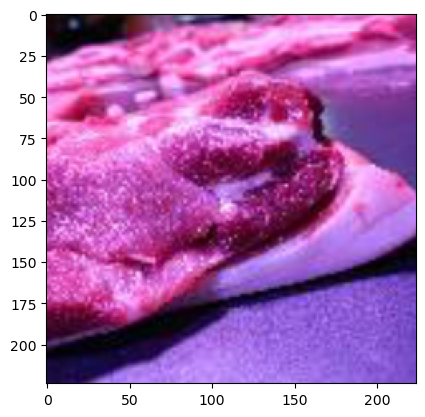

[1     10]   loss: 0.070
[1     20]   loss: 0.069
[1     30]   loss: 0.066
[1     40]   loss: 0.066
[1     50]   loss: 0.065
[1     60]   loss: 0.064
[1     70]   loss: 0.069
[1     80]   loss: 0.064
[1     90]   loss: 0.069
[1    100]   loss: 0.072
[1    110]   loss: 0.067
[1    120]   loss: 0.072
[1    130]   loss: 0.068
[1    140]   loss: 0.071
[1    150]   loss: 0.066
[1    160]   loss: 0.068
[1    170]   loss: 0.075
[1    180]   loss: 0.065
[1    190]   loss: 0.074
[1    200]   loss: 0.064
[1    210]   loss: 0.071
[1    220]   loss: 0.065
[1    230]   loss: 0.071
[1    240]   loss: 0.065
[1    250]   loss: 0.064
[1    260]   loss: 0.063
[1    270]   loss: 0.058
[1    280]   loss: 0.055
[1    290]   loss: 0.059
[1    300]   loss: 0.075
[1    310]   loss: 0.073
[1    320]   loss: 0.078
[1    330]   loss: 0.070
[1    340]   loss: 0.066
[1    350]   loss: 0.070
[1    360]   loss: 0.070
[1    370]   loss: 0.069
[1    380]   loss: 0.059
[1    390]   loss: 0.061
[1    400]   loss: 0.065


[2    420]   loss: 0.037
[2    430]   loss: 0.041
[2    440]   loss: 0.048
[2    450]   loss: 0.039
[2    460]   loss: 0.019
[2    470]   loss: 0.064
[2    480]   loss: 0.064
[2    490]   loss: 0.054
[2    500]   loss: 0.053
[2    510]   loss: 0.081
[2    520]   loss: 0.053
[2    530]   loss: 0.073
[2    540]   loss: 0.054
[2    550]   loss: 0.056
[2    560]   loss: 0.051
[2    570]   loss: 0.057
[2    580]   loss: 0.035
[2    590]   loss: 0.039
[2    600]   loss: 0.029
[2    610]   loss: 0.055
[2    620]   loss: 0.046
[2    630]   loss: 0.026
[2    640]   loss: 0.016
[2    650]   loss: 0.010
[2    660]   loss: 0.048
[2    670]   loss: 0.046
[2    680]   loss: 0.053
[2    690]   loss: 0.034
[2    700]   loss: 0.045
[2    710]   loss: 0.028
[2    720]   loss: 0.080
[2    730]   loss: 0.068
[2    740]   loss: 0.031
[2    750]   loss: 0.043
[2    760]   loss: 0.045
[2    770]   loss: 0.068
[2    780]   loss: 0.064
[2    790]   loss: 0.095
[2    800]   loss: 0.050
[2    810]   loss: 0.062


[3    830]   loss: 0.005
[3    840]   loss: 0.004
[3    850]   loss: 0.049
[3    860]   loss: 0.029
[3    870]   loss: 0.120
[3    880]   loss: 0.047
[3    890]   loss: 0.014
[3    900]   loss: 0.047
[3    910]   loss: 0.041
[3    920]   loss: 0.028
[3    930]   loss: 0.016
[3    940]   loss: 0.021
[3    950]   loss: 0.033
[3    960]   loss: 0.045
[3    970]   loss: 0.004
[3    980]   loss: 0.014
[3    990]   loss: 0.023
[3   1000]   loss: 0.092
[3   1010]   loss: 0.081
[3   1020]   loss: 0.018
[3   1030]   loss: 0.010
[3   1040]   loss: 0.030
[3   1050]   loss: 0.047
[3   1060]   loss: 0.011
[3   1070]   loss: 0.026
[3   1080]   loss: 0.020
[3   1090]   loss: 0.005
[3   1100]   loss: 0.004
[3   1110]   loss: 0.010
[3   1120]   loss: 0.020
[3   1130]   loss: 0.015
[3   1140]   loss: 0.006
[3   1150]   loss: 0.006
[3   1160]   loss: 0.003
[3   1170]   loss: 0.010
[3   1180]   loss: 0.012
[3   1190]   loss: 0.004
[3   1200]   loss: 0.022
[3   1210]   loss: 0.008
[3   1220]   loss: 0.006


[4   1240]   loss: 0.005
[4   1250]   loss: 0.000
[4   1260]   loss: 0.003
[4   1270]   loss: 0.001
[4   1280]   loss: 0.002
[4   1290]   loss: 0.019
[4   1300]   loss: 0.005
[4   1310]   loss: 0.004
[4   1320]   loss: 0.007
[4   1330]   loss: 0.001
[4   1340]   loss: 0.038
[4   1350]   loss: 0.003
[4   1360]   loss: 0.016
[4   1370]   loss: 0.014
[4   1380]   loss: 0.001
[4   1390]   loss: 0.023
[4   1400]   loss: 0.003
[4   1410]   loss: 0.014
[4   1420]   loss: 0.008
[4   1430]   loss: 0.001
[4   1440]   loss: 0.003
[4   1450]   loss: 0.008
[4   1460]   loss: 0.000
[4   1470]   loss: 0.001
[4   1480]   loss: 0.000
[4   1490]   loss: 0.001
[4   1500]   loss: 0.001
[4   1510]   loss: 0.001
[4   1520]   loss: 0.002
[4   1530]   loss: 0.002
[4   1540]   loss: 0.001
[4   1550]   loss: 0.001
[4   1560]   loss: 0.003
[4   1570]   loss: 0.001
[4   1580]   loss: 0.000
[4   1590]   loss: 0.001
[4   1600]   loss: 0.002
[4   1610]   loss: 0.001
[4   1620]   loss: 0.000
[4   1630]   loss: 0.000


KeyboardInterrupt: 

In [6]:
path = r'C:/Users/beichen/dataset/pork'
dataset = MyDataset(path,transform=transforms)
 
data_loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True,drop_last=True)#开始是64
 
for i, data in enumerate(data_loader):
    images, labels = data
 
    # 打印数据集中的图片
    img = torchvision.utils.make_grid(images).numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()
 
    break

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,16,3)
        self.maxpool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16,5,3)
 
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(54*54*5, 1200)
        #self.fc1 = nn.Linear(55*55*5, 1200)
        self.fc2 = nn.Linear(1200,64)
        self.fc3 = nn.Linear(64,2)
 
    def forward(self,x):
        x = self.maxpool(self.relu(self.conv1(x)))    #113
        x = self.maxpool(self.relu(self.conv2(x)))    #55
        x = x.view(-1, 54*54*5)
        #x = x.view(-1, self.num_flat_features(x))
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
 
        return num_features
model = Net()

#保存模型的状态字典
#torch.save(Net, 'model_name.pth')#***********************************************

#在GPU上训练模型
#device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print(device)

#将模型转移到GPU上
#model.to(device)
#input = input.to(device)
#tensor=tensor.cuda()

#将输入的图片张量和标签张量转移到GPU上
#inputs,labels=data[0].to(device),data[1].to(device)

import torch.optim as optim
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

def compute_acc(model,loader):
    model.eval()

    correct = 0
    total = len(loader.dataset)
    for x,y in loader:
        with torch.no_grad():
            logits = model(x)
            pred = logits.argmax(dim=1)
        correct += torch.eq(pred,y).sum().float().item()
    return correct / total

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader):
        #val_acc = compute_acc(model, data_loader)
        
        images, label = data
        
        out = model(images)
 
        loss = criterion(out, label)
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        running_loss += loss.item()
        if(i+1)%10 == 0:
            print('[%d  %5d]   loss: %.3f'%(epoch+1, i+1, running_loss/100))#,',val_acc:',compute_acc(model,data_loader))
            #print('val_acc:',val_acc)
            running_loss = 0.0
print('finished train')

In [15]:
#保存模型
torch.save(Net, 'model_name.pth')   #保存的是模型， 不止是w和b权重值
 
# 读取模型
model = torch.load('model_name.pth')

In [21]:
from PIL import Image,ImageFont,ImageDraw
import torch
#from MyModel import mymodel
import PIL
import cv2
from torchvision import transforms
import numpy as np

#image = Image.open(r"C:/Users/beichen/dataset/pork/class2/IMG_2472.jpg")
#image.show()

class_names = ['0','1']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net()#mymodel([3,32,32])
#model.load_state_dict(torch.load("model_name.pth"))
model.to(device)
model.eval()
print(model)
img_path = "C:/Users/beichen/dataset/pork/class2/IMG_2476.jpg"

transform_valid = transforms.Compose([
    transforms.Resize((223, 223)),    #?????????
    transforms.ToTensor()
  ]
)
img = Image.open(img_path)
img_ = transform_valid(img).unsqueeze(0) #拓展维度

img_ = img_.to(device)
outputs = model(img_)

_, indices = torch.max(outputs,1)
percentage = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
perc = percentage[int(indices)].item()
result = class_names[indices]
print('预测类别为:', result,'(0代表五花肉，1代表梅花肉)')

#得到预测结果，并且从大到小排序
_, indices = torch.sort(outputs, descending=True)
#打印每个预测值的百分数
percentage = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
print([(class_names[idx], percentage[idx].item()) for idx in indices[0][:2]])

# bk_img = cv2.imread("C:/Users/.../file.jpg")
# #设置需要显示的字体
# fontpath = "font/simsun.ttc"
# font = ImageFont.truetype(fontpath, 32)
# img_pil = Image.fromarray(bk_img)
# draw = ImageDraw.Draw(img_pil)
# draw.text((20, 30),  "这张图片的类别可能是："+str(result), font = font, fill = (25, 25, 25))
# bk_img = np.array(img_pil)
# cv2.imshow("add_text",bk_img)
# cv2.waitKey()
# cv2.imwrite("add_text.jpg",bk_img)


# 创建一个照片文件
image = Image.open(img_path)
fontpath = "font/simsun.ttc"
font = ImageFont.truetype(fontpath, 50)
draw = ImageDraw.Draw(image)



text = "这张图片中肉的类别可能是："+str(result)+"\n<0代表五花肉\n1代表梅花肉>\n"

# drawing text size
draw.text((50, 50), text, font=font,fill='yellow', align="left")

image.show()


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 5, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (fc1): Linear(in_features=14580, out_features=1200, bias=True)
  (fc2): Linear(in_features=1200, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)
预测类别为: 0 (0代表五花肉，1代表梅花肉)
[('0', 54.022823333740234), ('1', 45.977176666259766)]
